In [1]:
# importing libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import dash
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.formula.api import ols
import missingno as msno
import functions


# stops python from showing scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)



df = pd.read_csv('/Users/stephen/Flatiron/Phase2/Project2/Data/kc_house_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Looking through data for NaN values

In [2]:

df['view'].value_counts(dropna=False)


NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
NaN             63
Name: view, dtype: int64

In [3]:
# Replacing categorical data with numeric

df['view'].replace({ 'NONE': 0, 'FAIR': 1, 'AVERAGE': 2, 'GOOD': 3, 'EXCELLENT': 5}, inplace=True)

In [4]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,NaN,0.00,...,7 Average,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,NO,0.00,...,7 Average,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,NO,0.00,...,6 Low Average,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,NO,0.00,...,7 Average,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,NO,0.00,...,8 Good,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.00,3,2.50,1530,1131,3.00,NO,0.00,...,8 Good,1530,0.0,2009,0.00,98103,47.70,-122.35,1530,1509
21593,6600060120,2/23/2015,400000.00,4,2.50,2310,5813,2.00,NO,0.00,...,8 Good,2310,0.0,2014,0.00,98146,47.51,-122.36,1830,7200
21594,1523300141,6/23/2014,402101.00,2,0.75,1020,1350,2.00,NO,0.00,...,7 Average,1020,0.0,2009,0.00,98144,47.59,-122.30,1020,2007
21595,291310100,1/16/2015,400000.00,3,2.50,1600,2388,2.00,NaN,0.00,...,8 Good,1600,0.0,2004,0.00,98027,47.53,-122.07,1410,1287


Only keeping the important collumns

In [5]:
df = df.drop(columns=['sqft_living15', 'sqft_lot15', 'sqft_basement', 'sqft_above', 'grade', 'sqft_lot', 'sqft_living', 'bathrooms', 'bedrooms', 'id', 'date', 'floors', 'waterfront', 'long', 'lat', 'yr_renovated']).set_index(df['id'])

In [6]:
df['condition'].replace({ 'Poor': 0, 'Fair': 1, 'Average': 2, 'Good': 3, 'Very Good': 4}, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      21597 non-null  float64
 1   view       21534 non-null  float64
 2   condition  21597 non-null  int64  
 3   yr_built   21597 non-null  int64  
 4   zipcode    21597 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1012.4 KB


In [8]:
df.describe()

,price,view,condition,yr_built,zipcode
count,21597.00,21534.00,21597.00,21597.00,21597.00
mean,540296.57,0.25,2.41,1971.00,98077.95
std,367368.14,0.84,0.65,29.38,53.51
min,78000.00,0.00,0.00,1900.00,98001.00
25%,322000.00,0.00,2.00,1951.00,98033.00
50%,450000.00,0.00,2.00,1975.00,98065.00
75%,645000.00,0.00,3.00,1997.00,98118.00
max,7700000.00,5.00,4.00,2015.00,98199.00


In [9]:
df.dropna(how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 7129300520 to 1523300157
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      21534 non-null  float64
 1   view       21534 non-null  float64
 2   condition  21534 non-null  int64  
 3   yr_built   21534 non-null  int64  
 4   zipcode    21534 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1009.4 KB


In [10]:
df['view'].dropna(how='any',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 7129300520 to 1523300157
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price      21534 non-null  float64
 1   view       21534 non-null  float64
 2   condition  21534 non-null  int64  
 3   yr_built   21534 non-null  int64  
 4   zipcode    21534 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 1009.4 KB


In [11]:
# getting rid of outliners before copy is made
Q1 = df['price'].quantile(0.0005)
Q3 = df['price'].quantile(0.99)
IQR = Q3 - Q1

df = df[df['price'] > Q1]
df = df[df['price'] < Q3]

df.describe()

,price,view,condition,yr_built,zipcode
count,21307.00,21307.00,21307.00,21307.00,21307.00
mean,518442.10,0.23,2.41,1971.00,98078.07
std,284552.13,0.79,0.65,29.31,53.46
min,89950.00,0.00,0.00,1900.00,98001.00
25%,320000.00,0.00,2.00,1952.00,98033.00
50%,450000.00,0.00,2.00,1975.00,98065.00
75%,635000.00,0.00,3.00,1997.00,98118.00
max,1960000.00,5.00,4.00,2015.00,98199.00


In [12]:
# make duplicate 
dum_df = df.copy()

In [13]:
enc = OrdinalEncoder()
df[['enc_view', 'enc_condition']] = enc.fit_transform(df[['view', 'condition']])

In [14]:
df['view'].describe()

count   21307.00
mean        0.23
std         0.79
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         5.00
Name: view, dtype: float64

In [15]:
#df = df[df["view"].str.contains("NONE")==False]
df.describe()

,price,view,condition,yr_built,zipcode,enc_view,enc_condition
count,21307.00,21307.00,21307.00,21307.00,21307.00,21307.00,21307.00
mean,518442.10,0.23,2.41,1971.00,98078.07,0.22,2.41
std,284552.13,0.79,0.65,29.31,53.46,0.73,0.65
min,89950.00,0.00,0.00,1900.00,98001.00,0.00,0.00
25%,320000.00,0.00,2.00,1952.00,98033.00,0.00,2.00
50%,450000.00,0.00,2.00,1975.00,98065.00,0.00,2.00
75%,635000.00,0.00,3.00,1997.00,98118.00,0.00,3.00
max,1960000.00,5.00,4.00,2015.00,98199.00,4.00,4.00


In [16]:
df['enc_view'].value_counts()

0.00    19336
2.00      927
3.00      479
1.00      316
4.00      249
Name: enc_view, dtype: int64

In [17]:
df['view'].value_counts(dropna=False)
df.describe()

,price,view,condition,yr_built,zipcode,enc_view,enc_condition
count,21307.00,21307.00,21307.00,21307.00,21307.00,21307.00,21307.00
mean,518442.10,0.23,2.41,1971.00,98078.07,0.22,2.41
std,284552.13,0.79,0.65,29.31,53.46,0.73,0.65
min,89950.00,0.00,0.00,1900.00,98001.00,0.00,0.00
25%,320000.00,0.00,2.00,1952.00,98033.00,0.00,2.00
50%,450000.00,0.00,2.00,1975.00,98065.00,0.00,2.00
75%,635000.00,0.00,3.00,1997.00,98118.00,0.00,3.00
max,1960000.00,5.00,4.00,2015.00,98199.00,4.00,4.00


In [18]:
df.describe()

,price,view,condition,yr_built,zipcode,enc_view,enc_condition
count,21307.00,21307.00,21307.00,21307.00,21307.00,21307.00,21307.00
mean,518442.10,0.23,2.41,1971.00,98078.07,0.22,2.41
std,284552.13,0.79,0.65,29.31,53.46,0.73,0.65
min,89950.00,0.00,0.00,1900.00,98001.00,0.00,0.00
25%,320000.00,0.00,2.00,1952.00,98033.00,0.00,2.00
50%,450000.00,0.00,2.00,1975.00,98065.00,0.00,2.00
75%,635000.00,0.00,3.00,1997.00,98118.00,0.00,3.00
max,1960000.00,5.00,4.00,2015.00,98199.00,4.00,4.00


In [19]:
df_matrix = df.corr()
df_matrix['price']

price            1.00
view             0.34
condition        0.03
yr_built         0.06
zipcode         -0.05
enc_view         0.34
enc_condition    0.03
Name: price, dtype: float64

In [20]:
df['view'].value_counts()

0.00    19336
2.00      927
3.00      479
1.00      316
5.00      249
Name: view, dtype: int64

In [21]:
#Q1 = df['price'].quantile(0.003)
#Q3 = df['price'].quantile(0.99)
#IQR = Q3 - Q1

#df = df[df['price'] > Q1]
#df = df[df['price'] < Q3]

df.describe()

,price,view,condition,yr_built,zipcode,enc_view,enc_condition
count,21307.00,21307.00,21307.00,21307.00,21307.00,21307.00,21307.00
mean,518442.10,0.23,2.41,1971.00,98078.07,0.22,2.41
std,284552.13,0.79,0.65,29.31,53.46,0.73,0.65
min,89950.00,0.00,0.00,1900.00,98001.00,0.00,0.00
25%,320000.00,0.00,2.00,1952.00,98033.00,0.00,2.00
50%,450000.00,0.00,2.00,1975.00,98065.00,0.00,2.00
75%,635000.00,0.00,3.00,1997.00,98118.00,0.00,3.00
max,1960000.00,5.00,4.00,2015.00,98199.00,4.00,4.00


(array([3464., 7733., 5144., 2603., 1168.,  457.,  312.,  193.,  140.,
          93.]),
 array([  89950.,  276955.,  463960.,  650965.,  837970., 1024975.,
        1211980., 1398985., 1585990., 1772995., 1960000.]),
 <BarContainer object of 10 artists>)

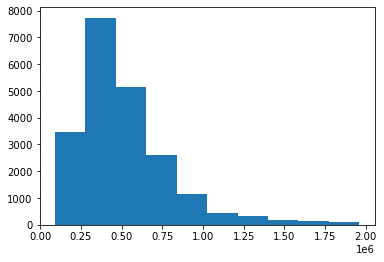

In [22]:
plt.hist(df['price'])

In [23]:
df_matrix = df.corr()
df_matrix['price']

price            1.00
view             0.34
condition        0.03
yr_built         0.06
zipcode         -0.05
enc_view         0.34
enc_condition    0.03
Name: price, dtype: float64

In [24]:
dum_df.describe()


,price,view,condition,yr_built,zipcode
count,21307.00,21307.00,21307.00,21307.00,21307.00
mean,518442.10,0.23,2.41,1971.00,98078.07
std,284552.13,0.79,0.65,29.31,53.46
min,89950.00,0.00,0.00,1900.00,98001.00
25%,320000.00,0.00,2.00,1952.00,98033.00
50%,450000.00,0.00,2.00,1975.00,98065.00
75%,635000.00,0.00,3.00,1997.00,98118.00
max,1960000.00,5.00,4.00,2015.00,98199.00


In [25]:
df.describe()

,price,view,condition,yr_built,zipcode,enc_view,enc_condition
count,21307.00,21307.00,21307.00,21307.00,21307.00,21307.00,21307.00
mean,518442.10,0.23,2.41,1971.00,98078.07,0.22,2.41
std,284552.13,0.79,0.65,29.31,53.46,0.73,0.65
min,89950.00,0.00,0.00,1900.00,98001.00,0.00,0.00
25%,320000.00,0.00,2.00,1952.00,98033.00,0.00,2.00
50%,450000.00,0.00,2.00,1975.00,98065.00,0.00,2.00
75%,635000.00,0.00,3.00,1997.00,98118.00,0.00,3.00
max,1960000.00,5.00,4.00,2015.00,98199.00,4.00,4.00


In [26]:
df.shape

(21307, 7)

In [27]:
dum_df = pd.get_dummies(data=dum_df, columns=['view'], drop_first=True)
dum_df.head()

,price,condition,yr_built,zipcode,view_1.0,view_2.0,view_3.0,view_5.0
id,,,,,,,,
7129300520,221900.00,2,1955,98178,0,0,0,0
6414100192,538000.00,2,1951,98125,0,0,0,0
5631500400,180000.00,2,1933,98028,0,0,0,0
2487200875,604000.00,4,1965,98136,0,0,0,0
1954400510,510000.00,2,1987,98074,0,0,0,0


In [28]:
dum_df = pd.get_dummies(data=dum_df, columns=['condition'], drop_first=True)

In [29]:
dum_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21307 entries, 7129300520 to 1523300157
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21307 non-null  float64
 1   yr_built     21307 non-null  int64  
 2   zipcode      21307 non-null  int64  
 3   view_1.0     21307 non-null  uint8  
 4   view_2.0     21307 non-null  uint8  
 5   view_3.0     21307 non-null  uint8  
 6   view_5.0     21307 non-null  uint8  
 7   condition_1  21307 non-null  uint8  
 8   condition_2  21307 non-null  uint8  
 9   condition_3  21307 non-null  uint8  
 10  condition_4  21307 non-null  uint8  
dtypes: float64(1), int64(2), uint8(8)
memory usage: 832.3 KB


In [30]:
dum_df = pd.get_dummies(data=dum_df, columns=['zipcode'], drop_first=True)

In [31]:
dum_df_matrix = dum_df.corr()
dum_df_matrix['price']

price            1.00
yr_built         0.06
view_1.0         0.09
view_2.0         0.16
view_3.0         0.19
                 ... 
zipcode_98177    0.04
zipcode_98178   -0.08
zipcode_98188   -0.06
zipcode_98198   -0.09
zipcode_98199    0.10
Name: price, Length: 79, dtype: float64

In [32]:
dum_df['price'].describe()

count     21307.00
mean     518442.10
std      284552.13
min       89950.00
25%      320000.00
50%      450000.00
75%      635000.00
max     1960000.00
Name: price, dtype: float64

In [33]:
dum_df

,price,yr_built,view_1.0,view_2.0,view_3.0,view_5.0,condition_1,condition_2,condition_3,condition_4,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.00,1955,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6414100192,538000.00,1951,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5631500400,180000.00,1933,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2487200875,604000.00,1965,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1954400510,510000.00,1987,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,360000.00,2009,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6600060120,400000.00,2014,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1523300141,402101.00,2009,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
#plt.bascatterr(x='view', height='price', data=df)

In [35]:
X = dum_df.drop(columns=['price'])
y = dum_df['price']

# Train / Test split\


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

#model= sm.OLS(y_train, sm.add_constant(X_train)).fit()
#model.summary()

#reg = LinearRegression()
#reg.fit(X_train, y_train)

#dum_y_prediction = reg.predict(X_test)
#dum_y_prediction

model= sm.OLS(y_train, sm.add_constant(X_train)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     276.2
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        09:10:15   Log-Likelihood:            -2.1644e+05
No. Observations:               15980   AIC:                         4.330e+05
Df Residuals:                   15901   BIC:                         4.336e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.841e+06   1.33e+05    -21.339      0.000    -3.1e+06   -2.58e+06
yr_built       1490.6235     64.799     23.004      0.000    1363.611    1617.636
view_1.0       1.867e+05   1.25e+04     14.968      0.000    1.62e+05    2.11e+05
view_2.0       2.134e+05   7464.076     28.588      0.000    1.99e+05    2.28e+05
view_3.0       3.475e+05   9976.998     34.825      0.000    3.28e+05    3.67e+05
view_5.0       5.614e+05   1.39e+04     40.416      0.000    5.34e+05    5.89e+05
condition_1    6.869e+04   4.48e+04      1.534      0.125   -1.91e+04    1.56e+05
condition_2    1.598e+05   4.17e+04      3.832      0.000    7.81e+04    2.42e+05
condition_3    1.531e+05   4.17e+04      3.672      0.000    7.14e+04    2.35e+05
condition_4    2.255e+05   4.19e+04      5.382      0.000    1.43e+05    3.08e+05
zipcode_98002 -2.759e+04   1.91e+04     -1.446      0.148    -6.5e+04    9802.785
zipcode_98003  6901.1272   1.71e+04      0.402      0.687   -2.67e+04    4.05e+04
zipcode_98004   8.72e+05   1.74e+04     50.260      0.000    8.38e+05    9.06e+05
zipcode_98005  5.222e+05   2.05e+04     25.481      0.000    4.82e+05    5.62e+05
zipcode_98006  4.654e+05   1.52e+04     30.618      0.000    4.36e+05    4.95e+05
zipcode_98007  3.451e+05   2.14e+04     16.114      0.000    3.03e+05    3.87e+05
zipcode_98008  2.998e+05   1.72e+04     17.444      0.000    2.66e+05    3.33e+05
zipcode_98010   1.49e+05   2.39e+04      6.237      0.000    1.02e+05    1.96e+05
zipcode_98011  2.068e+05   1.89e+04     10.923      0.000     1.7e+05    2.44e+05
zipcode_98014  1.635e+05   2.28e+04      7.166      0.000    1.19e+05    2.08e+05
zipcode_98019  1.232e+05   1.92e+04      6.419      0.000    8.56e+04    1.61e+05
zipcode_98022 -2.626e+04   1.84e+04     -1.429      0.153   -6.23e+04    9768.698
zipcode_98023  8675.1706   1.49e+04      0.582      0.561   -2.06e+04    3.79e+04
zipcode_98024  2.758e+05   2.62e+04     10.547      0.000    2.25e+05    3.27e+05
zipcode_98027  2.862e+05   1.57e+04     18.232      0.000    2.55e+05    3.17e+05
zipcode_98028  1.748e+05   1.71e+04     10.210      0.000    1.41e+05    2.08e+05
zipcode_98029  3.111e+05   1.65e+04     18.870      0.000    2.79e+05    3.43e+05
zipcode_98030  1.666e+04   1.78e+04      0.937      0.349   -1.82e+04    5.15e+04
zipcode_98031  2.757e+04    1.7e+04      1.620      0.105   -5792.618    6.09e+04
zipcode_98032 -1.156e+04   2.27e+04     -0.508      0.611   -5.61e+04     3.3e+04
zipcode_98033  4.462e+05   1.54e+04     28.882      0.000    4.16e+05    4.76e+05
zipcode_98034  2.116e+05   1.47e+04     14.391      0.000    1.83e+05     2.4e+05
zipcode_98038   6.75e+04   1.45e+04      4.668      0.000    3.92e+04    9.58e+04
zipcode_98039  1.143e+06   4.11e+04     27.805      0.000    1.06e+06    1.22e+06
zipcode_98040  7.285e+05   1.76e+04     41.304   

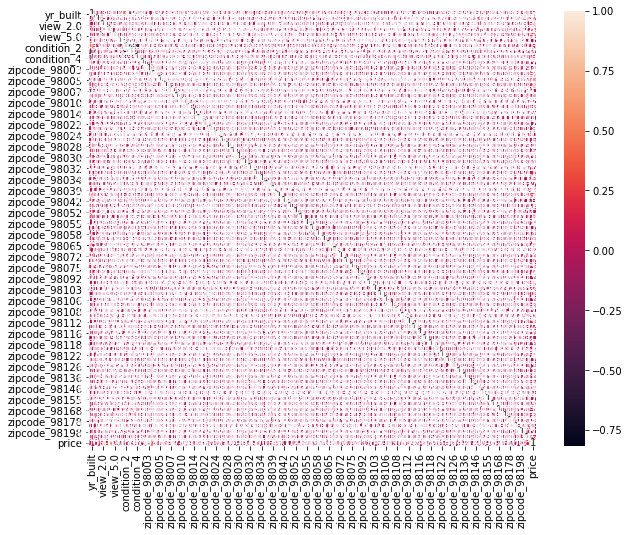

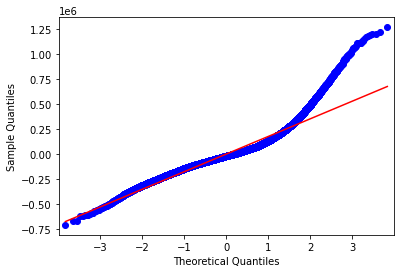

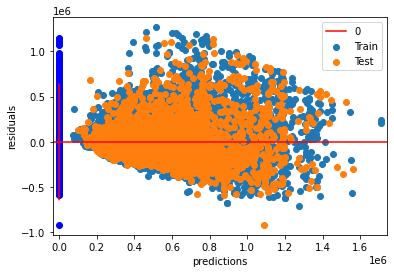

Train R2: 0.5753
Test R2: 0.5772
****
Train RMSE: $184,513.80
Test RMSE: $187,689.97
****
Train MAE: $126,843.29
Test MAE: $129,126.85


In [36]:
train_df = X_train.merge(y_train, how='outer', left_index=True, right_index=True)
train_pred = X_train.merge(y_train, how='outer', left_index=True, right_index=True)
train_preds = model.predict(sm.add_constant(X_train))
test_preds = model.predict(sm.add_constant(X_test))

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(train_df.corr(), annot=True, )
plt.show()

    # Check for residual normality
train_residuals = y_train - train_preds
sm.qqplot(train_residuals, line='r');
test_residuals = y_test - test_preds
sm.qqplot(test_residuals, line='r');

 # Checking heteroskedacity
plt.scatter(train_preds, train_residuals, label='Train')
plt.scatter(test_preds, test_residuals, label='Test')

plt.axhline(y=0, color='red', label='0')
plt.xlabel('predictions')
plt.ylabel('residuals')
plt.legend()
plt.show()

train_preds = model.predict(sm.add_constant(X_train))
test_preds = model.predict(sm.add_constant(X_test))
functions.evaluate(y_train, train_preds, y_test, test_preds)